# Astropy I: Introduction

In [4]:
#Introduction to FITS files
from astropy.io import fits

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats

m3_fits = fits.open('Messier3.fits')
m3_fits.info()

Filename: Messier3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     115   (4096, 4108)   int16 (rescales to uint16)   


In [5]:
m3_header = m3_fits[0].header
m3_header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 4096 / length of data axis                            
NAXIS2  =                 4108 / length of data axis                            
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.5 build on Apr 11 2020 00:33:30.          
CTIME   =           1586578832 / exposure start (seconds since 1.1.1970)        
USEC    =                  515 / exposure start micro seconds                   
JD      =     2458950.68092013 / Modified Julian Date                           
DATE-OBS= '2020-04-11T04:20:32.000' / start of exposure                         
EXPOSURE=                  30. / exposure length in seconds                     
EXPTIME =                  3

In [6]:
m3_header['DATE-OBS']

'2020-04-11T04:20:32.000'

In [7]:
m3_header[3]

4096

In [8]:
#update values in the header file
m3_header['DATE-OBS']='April 10th, 2020'

m3_header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 4096 / length of data axis                            
NAXIS2  =                 4108 / length of data axis                            
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.5 build on Apr 11 2020 00:33:30.          
CTIME   =           1586578832 / exposure start (seconds since 1.1.1970)        
USEC    =                  515 / exposure start micro seconds                   
JD      =     2458950.68092013 / Modified Julian Date                           
DATE-OBS= 'April 10th, 2020'   / start of exposure                              
EXPOSURE=                  30. / exposure length in seconds                     
EXPTIME =                  3

In [9]:
m3_header.comments['EXPOSURE']

'exposure length in seconds'

In [11]:
m3_data = m3_fits[0].data
print(m3_data.shape, m3_data.dtype)

(4108, 4096) uint16


In [12]:
print(m3_data[2020:2025,2010:2015])

[[1450 1473 1413 1360 1280]
 [1397 1406 1453 1486 1383]
 [1328 1489 1553 1635 1546]
 [1442 1535 1661 1743 1548]
 [1418 1579 1702 1788 1575]]


<IPython.core.display.Javascript object>


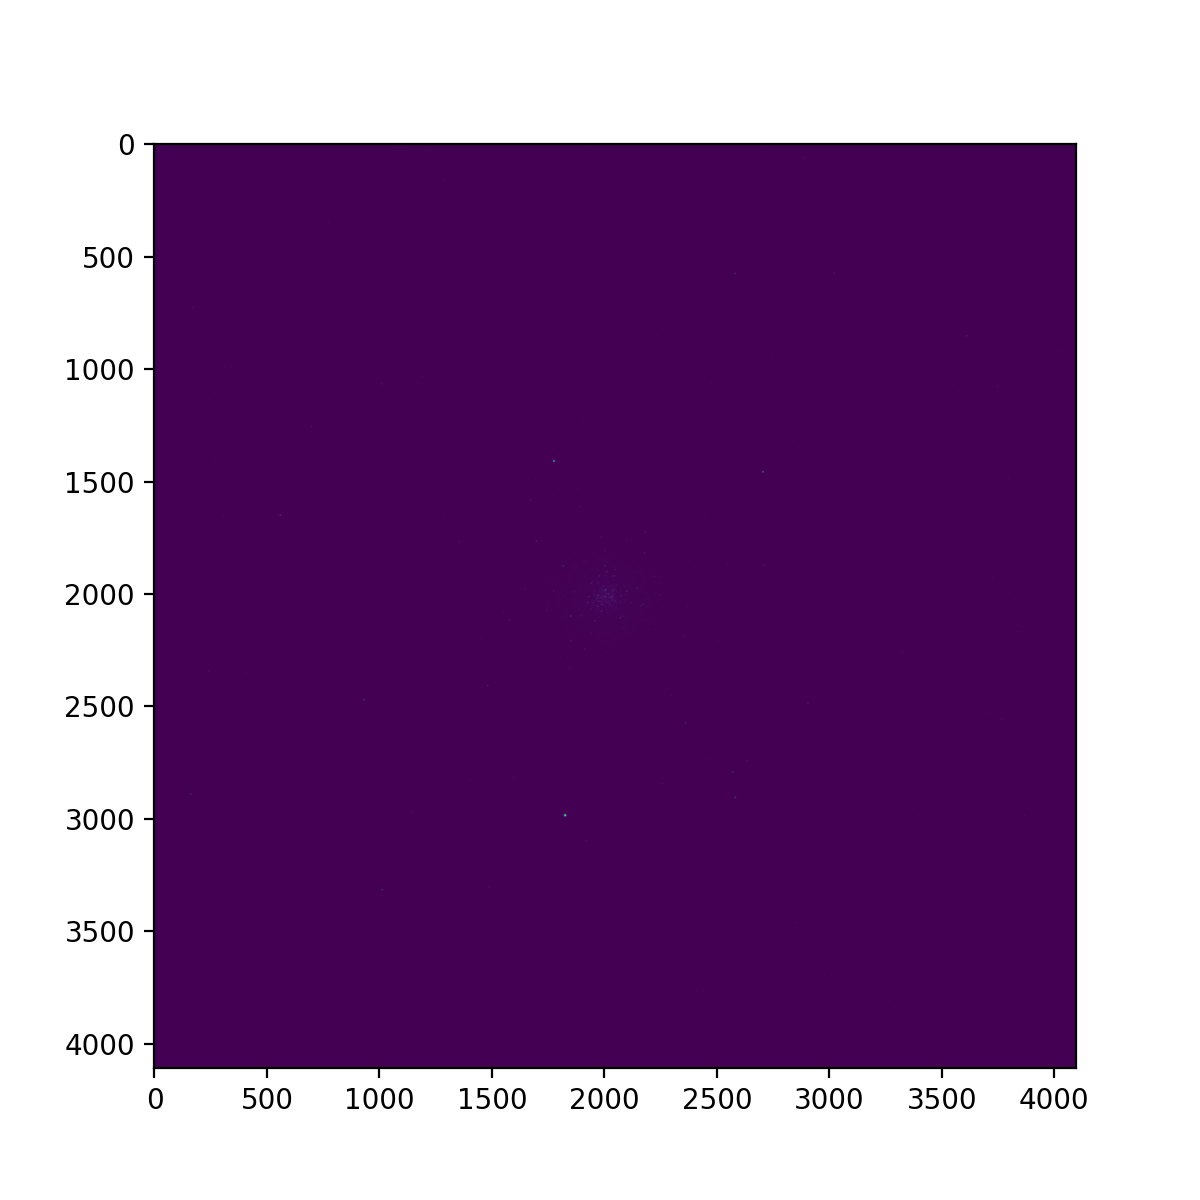

In [14]:
plt.figure(figsize=(6,6))
plt.imshow(m3_data)

In [15]:
mean, median, std = sigma_clipped_stats(m3_data)

<IPython.core.display.Javascript object>


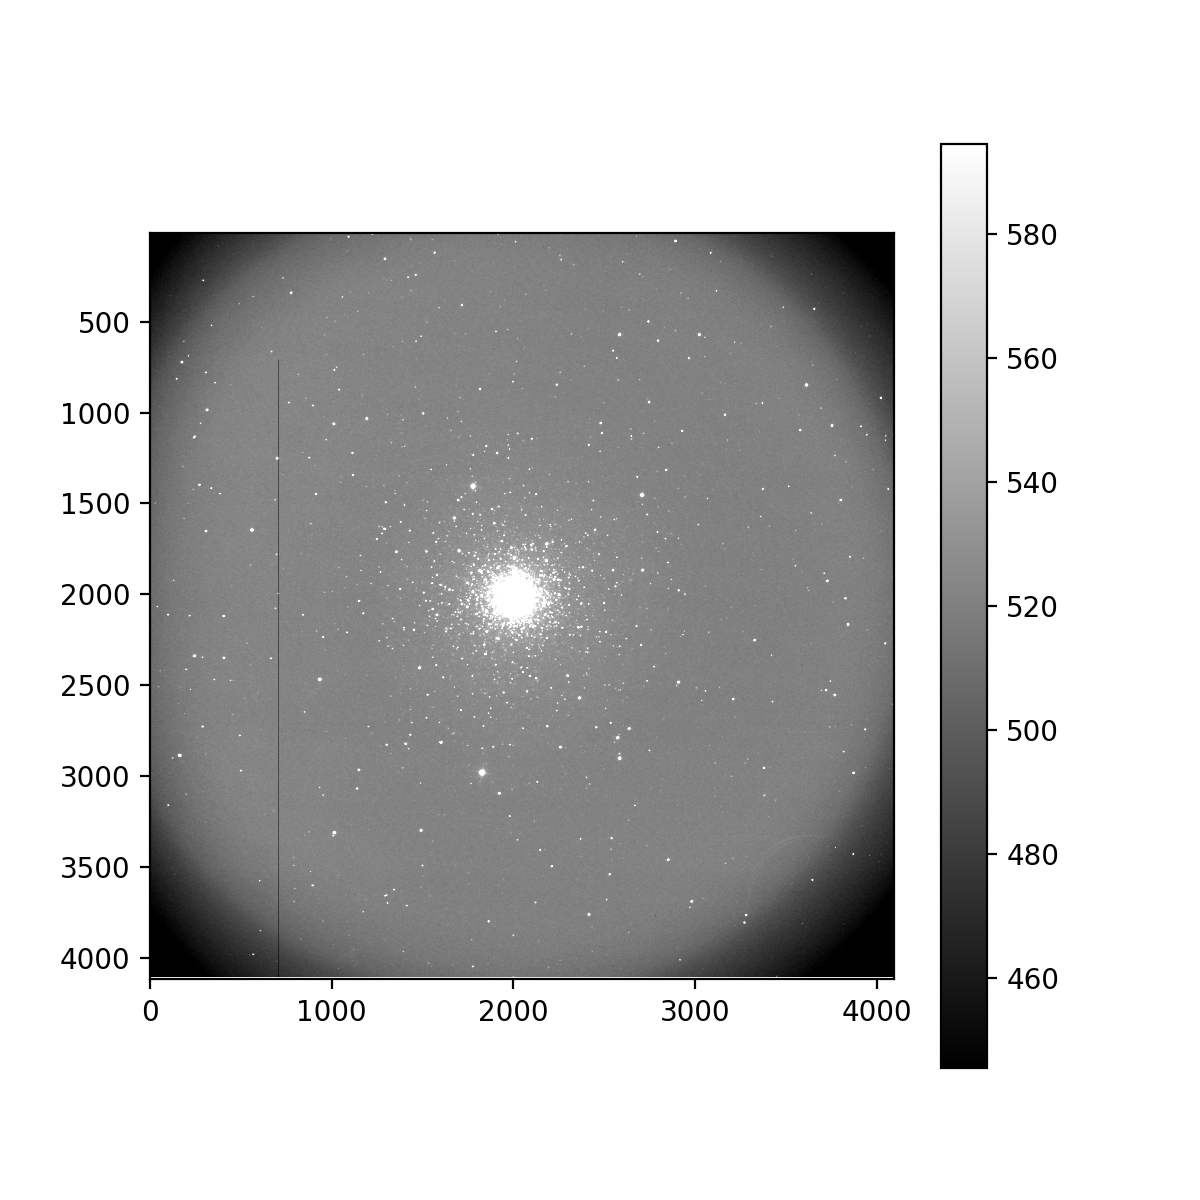

In [16]:
plt.figure(figsize=(6,6))

plt.imshow(m3_data, vmin = median - 5*std, vmax = median + 5*std, cmap='gray')
plt.colorbar()


<IPython.core.display.Javascript object>


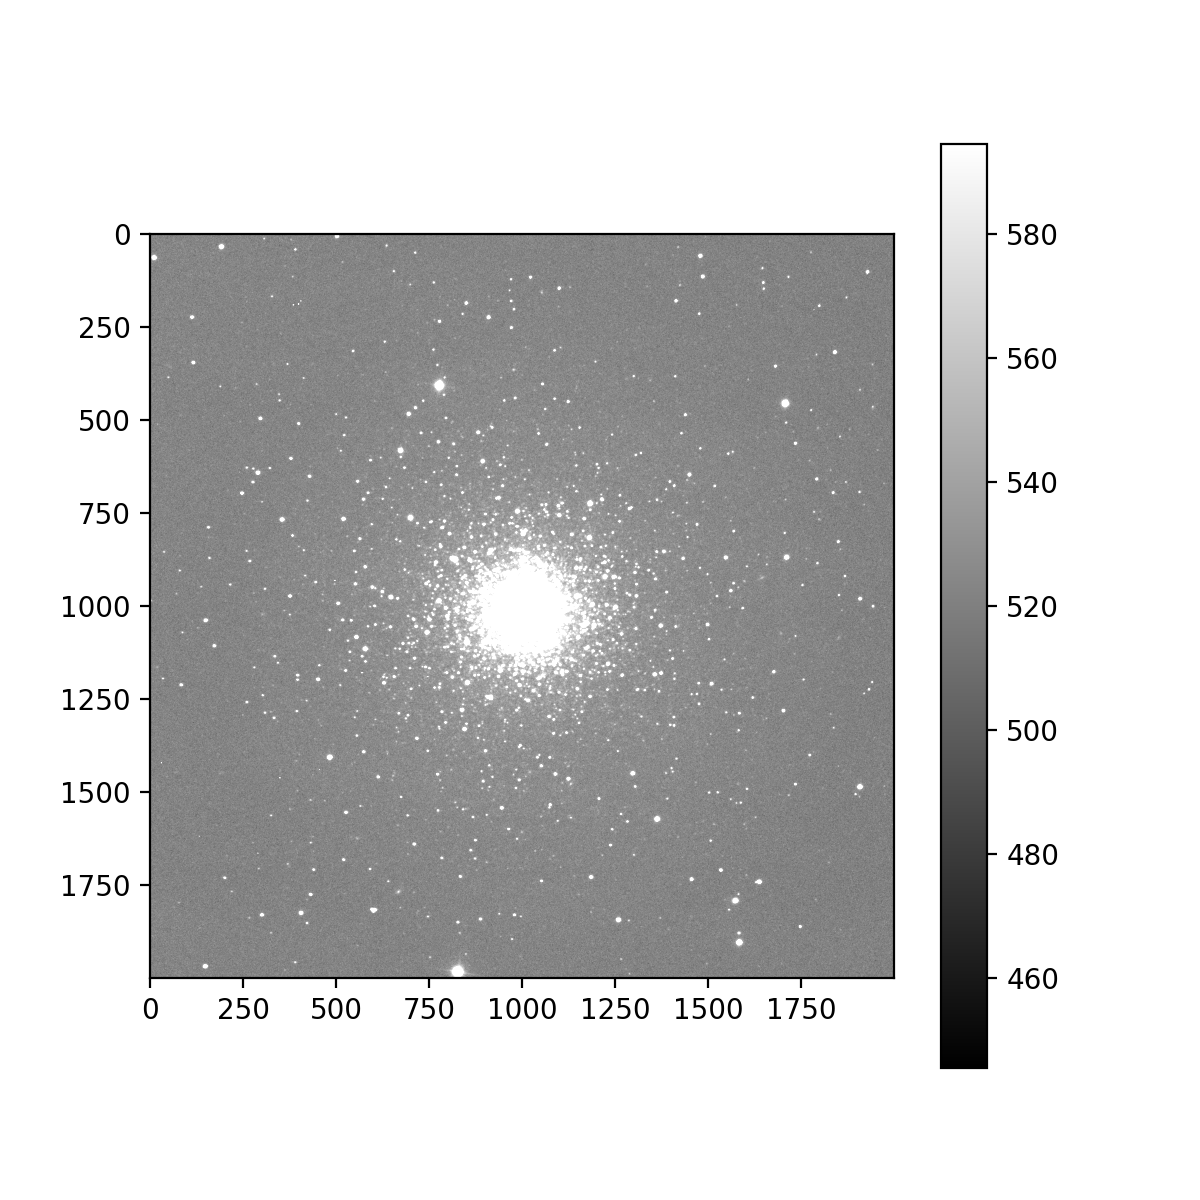

In [17]:
plt.figure(figsize=(6,6))

plt.imshow(m3_data[1000:3000,1000:3000], vmin = median - 5*std, vmax = median + 5*std, cmap='gray')
plt.colorbar()

In [ ]:
%matplotlib inline

In [ ]:
def get_background_histogram(array, min_count, max_count):
    """
        array is the numpy array that contains the counts for each pixel
        the bins for the histogram will be np.arange(min_count, max_count, 1)
    """
    flattened_array = array.flatten()
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels

In [24]:
m3_data_background_1 = m3_data[125:275,1450:1600]
print(np.mean(m3_data_background_1))
m3_data_background_2 = m3_data[1850:1975,1780:1920]
print(np.mean(m3_data_background_2))
m3_data_background_3 = m3_data[1100:1200,1910:1990]
print(np.mean(m3_data_background_3))


522.4088
596.9445142857143
524.947375


<IPython.core.display.Javascript object>


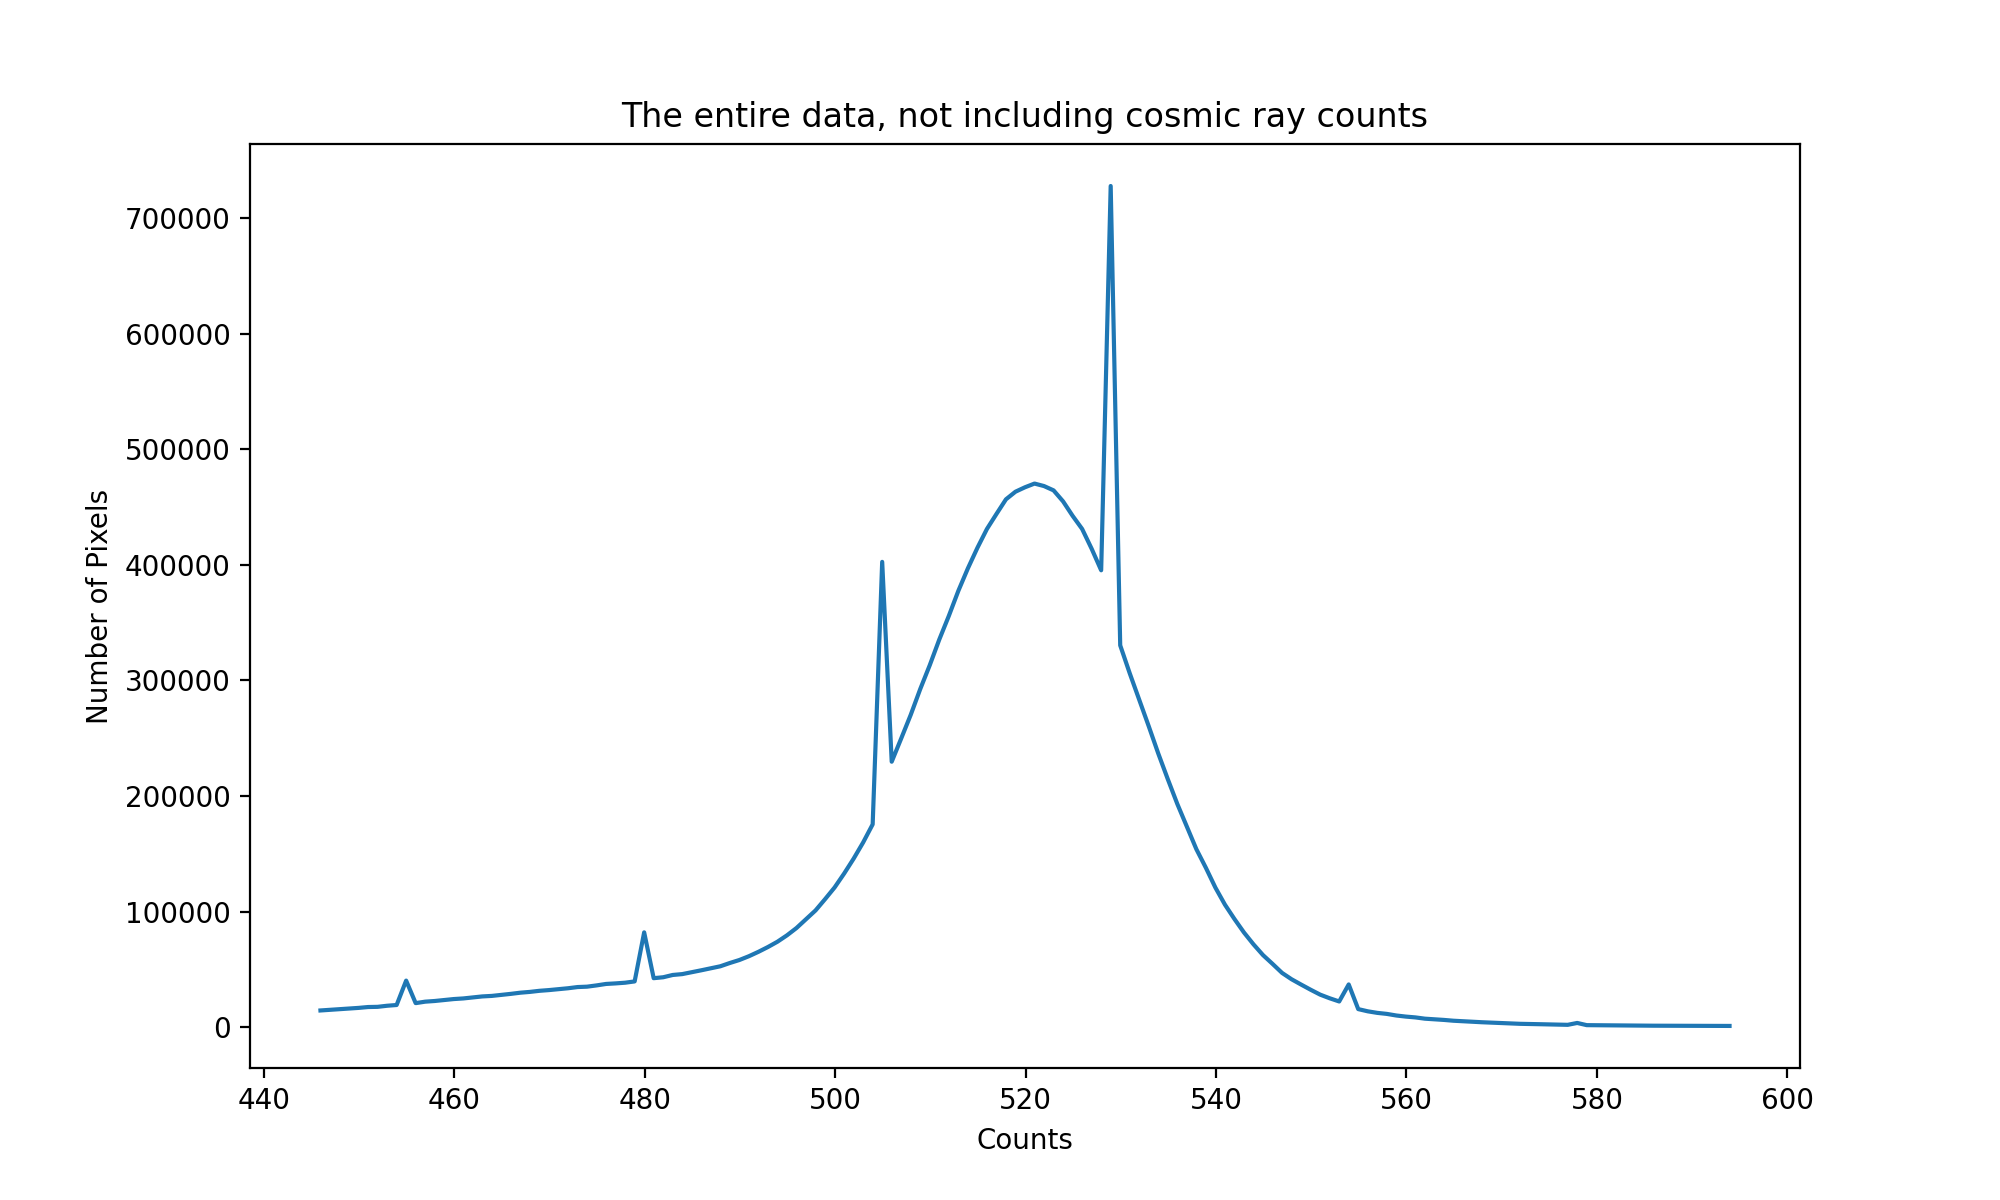

In [26]:
def get_background_histogram(array, min_count, max_count):
    """
        array is the numpy array that contains the counts for each pixel
        the bins for the histogram will be np.arange(min_count, max_count, 1)
    """
    flattened_array = array.flatten()
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels



vmin = median - 5*std
vmax = median + 5*std
bins, num_pixels = get_background_histogram(m3_data,vmin,vmax) #entire data, not including cosmic ray counts

plt.figure(figsize = (10,6))
plt.title("The entire data, not including cosmic ray counts")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)

<IPython.core.display.Javascript object>


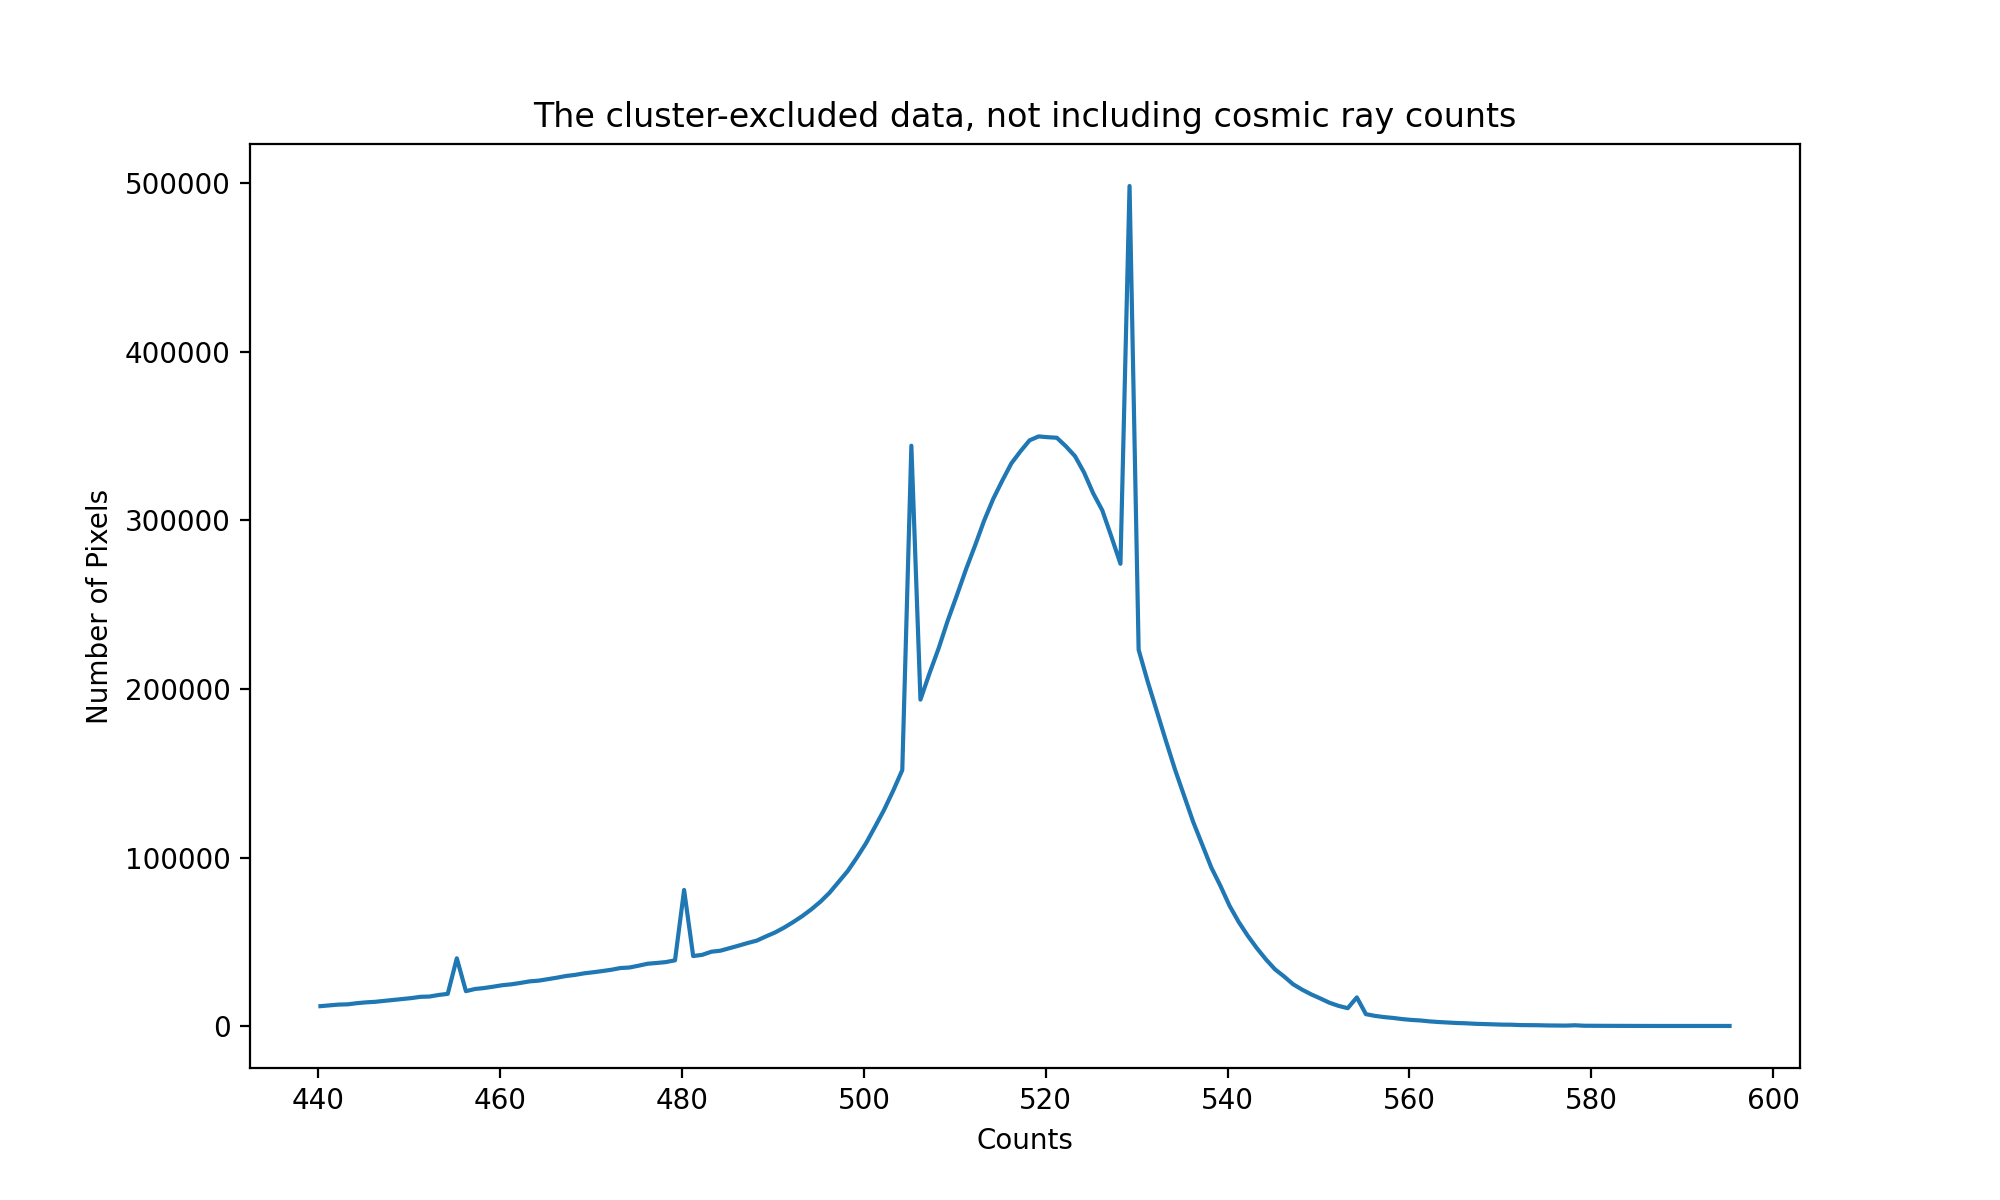

In [30]:
# This will return a flattened concatenated array of the slices
pixels_without_cluster = np.concatenate([m3_data[:1000, :], m3_data[3000:, :], m3_data[1000:3000, :1000], m3_data[1000:3000, 3000:]], axis=None)


bkg_mean, bkg_median, bkg_std = sigma_clipped_stats(pixels_without_cluster)

min_count = bkg_median - 5*bkg_std
max_count = bkg_median + 5*bkg_std
bins_bkg, num_pixels_bkg = get_background_histogram(pixels_without_cluster, min_count, max_count)

plt.figure(figsize = (10,6))
plt.title("The cluster-excluded data, not including cosmic ray counts")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')

plt.plot(bins_bkg, num_pixels_bkg)